In [1]:
import pickle
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier


In [4]:
class RemoveCorrelationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, correlation_threshold=0.7):
        self.correlation_threshold = correlation_threshold


    def fit(self, X, Y=None):
        df = pd.DataFrame(X)
        df_corr = df.corr(method='pearson', min_periods=1)
        df_not_correlated = ~(df_corr.mask(
            np.tril(np.ones([len(df_corr)] * 2, dtype=bool))).abs() > self.correlation_threshold).any()
        self.un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
        return self

    def transform(self, X, Y=None):
        df = pd.DataFrame(X)
        df = df[self.un_corr_idx]
        return df.values

NameError: name 'BaseEstimator' is not defined

In [3]:
filename1 = "model_copy1.pkl"
filename2 = "finalized_model_copy_9.pkl"

# load clf

loaded_model_1 = pickle.load(open(filename1, 'rb'))
loaded_model_2 = pickle.load(open(filename2, 'rb'))


AttributeError: Can't get attribute 'RemoveCorrelationTransformer' on <module '__main__'>

## copy 1

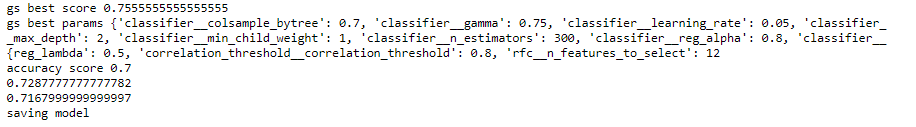

## copy 9
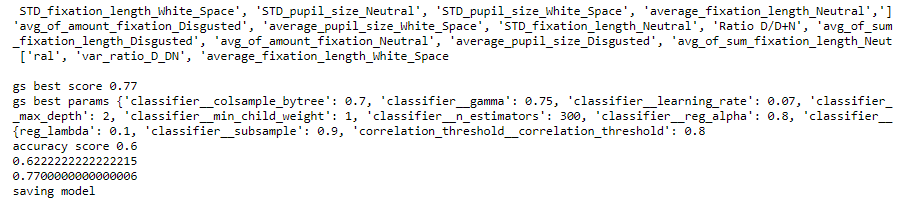